# Klasifikasi Gambar Komponen Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import sklearn 
import itertools

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

# Build and Recognize Dataset

## Dataset Standardization

In [2]:
# 180 x 180 x 3
img_height = 180
img_width = 180
batch_size = 32 

## Build Dataset

In [3]:
training_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Training', 
            image_size=(img_height, img_width), batch_size=batch_size)
            
testing_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Testing',        
            image_size=(img_height, img_width), batch_size=batch_size)

Found 5928 files belonging to 6 classes.
Found 1482 files belonging to 6 classes.


## Find Class Names

In [4]:
class_names = training_ds.class_names
print("Training dataset: ",class_names)

class_names = testing_ds.class_names
print("Testing dataset: ",class_names)

Training dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']
Testing dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


## Dataset Visualization

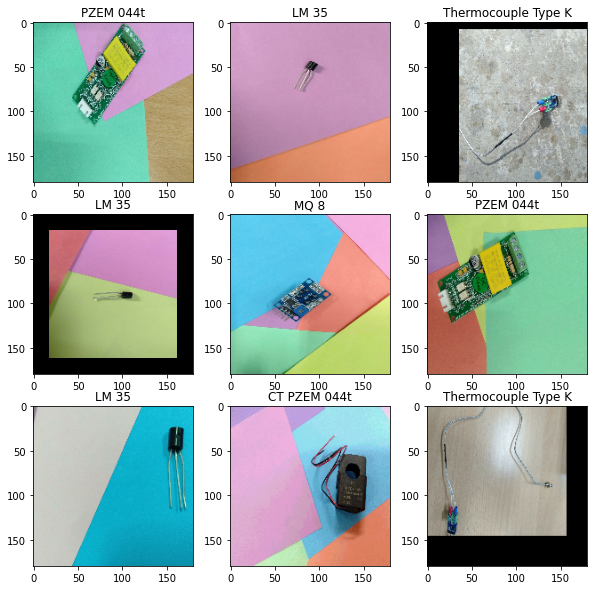

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

## Tuning

In [6]:
# Tune dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Build Classification Model

## Create CNN Model

In [7]:
# Class target < - 6 class
num_classes = 6

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [9]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [10]:
# Train Model 
epochs = 15

# Simpan dalam history
history = model.fit( 
    training_ds,
    epochs=epochs
) 

Epoch 1/15
186/186 [==============================] - 268s 1s/step - loss: 0.9599 - accuracy: 0.6365
Epoch 2/15
186/186 [==============================] - 180s 926ms/step - loss: 0.2556 - accuracy: 0.9136
Epoch 3/15
186/186 [==============================] - 169s 869ms/step - loss: 0.1144 - accuracy: 0.9595
Epoch 4/15
186/186 [==============================] - 173s 892ms/step - loss: 0.0720 - accuracy: 0.9742
Epoch 5/15
186/186 [==============================] - 222s 1s/step - loss: 0.0864 - accuracy: 0.9754
Epoch 6/15
186/186 [==============================] - 261s 1s/step - loss: 0.0537 - accuracy: 0.9838
Epoch 7/15
186/186 [==============================] - 151s 764ms/step - loss: 0.0270 - accuracy: 0.9911
Epoch 8/15
186/186 [==============================] - 160s 828ms/step - loss: 0.0762 - accuracy: 0.9727
Epoch 9/15
186/186 [==============================] - 142s 726ms/step - loss: 0.0283 - accuracy: 0.9916
Epoch 10/15
186/186 [==============================] - 137s 703ms/step - 

## Training Visualization

Text(0.5, 1.0, 'Training Accuracy & Loss')

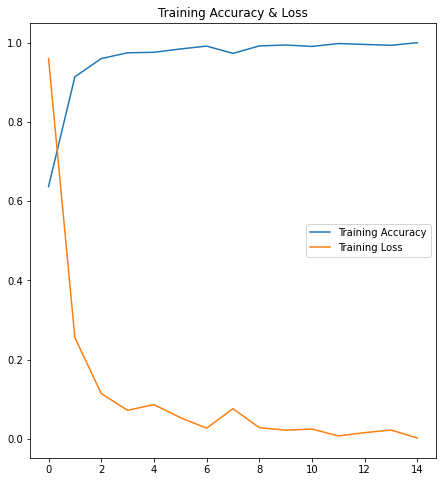

In [11]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']

# Visualisasi Training Loss
loss = history.history['loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(16, 8)) # Tampilan dalam figure

plt.subplot(1, 2, 1) # Tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # Plot akurasi training
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='right') 
plt.title('Training Accuracy & Loss')

# Testing Model

## Testing Accuracy & Loss

In [12]:
test_loss, test_acc = model.evaluate(testing_ds, verbose = 1)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

47/47 [==============================] - 61s 943ms/step - loss: 1.6051 - accuracy: 0.7719

Test accuracy: 0.7719298005104065

Test loss: 1.605087399482727


# Prediction

## Confidence Score

In [13]:
# Predict image
img = keras.preprocessing.image.load_img(
    "C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Testing/LM 35/LM 35_Testing (1)_blur_1.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 1s/step
This image most likely belongs to LM 35 with a 100.00 percent confidence.


In [14]:
test_url = "https://static-01.daraz.pk/p/e44b816c6cddd662218fe8a6ab226594.jpg"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 39ms/step
Gambar ini adalah CT PZEM 044t dengan akurasi 100.00%.


## Get the Label Names and Convert Into a NumPy Ainrray

In [15]:
class_names = np.array(class_names)

print(class_names)

['CT PZEM 044t' 'LM 35' 'MQ 4' 'MQ 8' 'PZEM 044t' 'Thermocouple Type K']


## Create an Image Batch and Make Predictions

In [16]:
image_batch, label_batch = next(iter(testing_ds))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

1/1 [==============================] - 0s 45ms/step
['CT PZEM 044t' 'LM 35' 'MQ 4' 'LM 35' 'MQ 4' 'MQ 8' 'CT PZEM 044t' 'MQ 8'
 'MQ 8' 'CT PZEM 044t' 'PZEM 044t' 'MQ 8' 'CT PZEM 044t'
 'Thermocouple Type K' 'MQ 8' 'CT PZEM 044t' 'Thermocouple Type K' 'MQ 4'
 'MQ 8' 'Thermocouple Type K' 'PZEM 044t' 'CT PZEM 044t' 'LM 35' 'LM 35'
 'CT PZEM 044t' 'MQ 4' 'CT PZEM 044t' 'CT PZEM 044t' 'MQ 4'
 'Thermocouple Type K' 'LM 35' 'MQ 4']


## Print True Labels and Predicted Indices

In [17]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [3 0 3 1 5 3 3 3 2 0 4 3 0 5 3 0 5 3 3 5 4 0 1 1 0 2 0 0 2 5 5 2]
Predicted labels:  [0 1 2 1 2 3 0 3 3 0 4 3 0 5 3 0 5 2 3 5 4 0 1 1 0 2 0 0 2 5 1 2]


## Plot Model Predictions

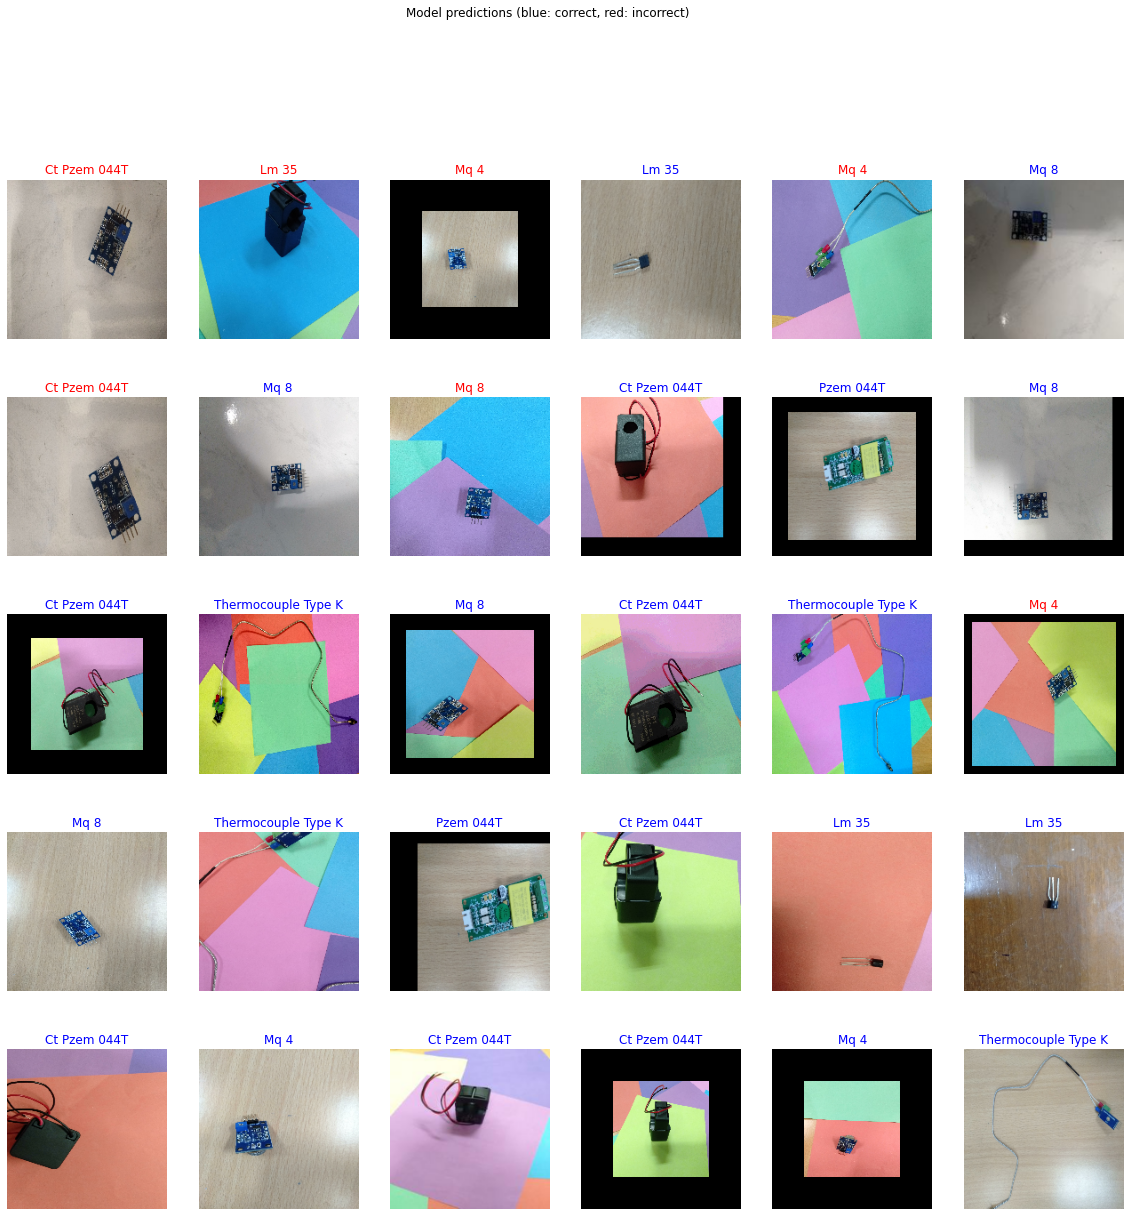

In [18]:
plt.figure(figsize=(20, 20))
for n in range(30):
    plt.subplot(5, 6, n+1)
    plt.subplots_adjust(hspace=0.)
    plt.imshow(image_batch[n].astype("uint8"))
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
    plt.suptitle("Model predictions (blue: correct, red: incorrect)")

   # print sendiri nama gambar hasil prediksi

# Model Evaluation

## Confusion Matrix

Normalized confusion matrix
[[0.875      0.125      0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.75       0.25       0.         0.        ]
 [0.22222222 0.         0.22222222 0.55555556 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.16666667 0.16666667 0.         0.         0.66666667]]


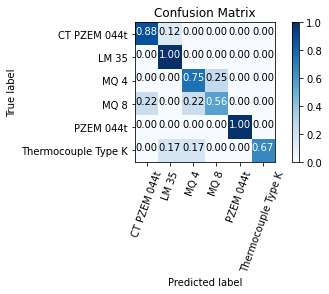

In [19]:
# confusion matrix


cm = confusion_matrix(label_batch, predicted_ids)
cm_plot_labels = ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']

def plot_confusion_matrix(cm, classes,
                            normalize=True,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
    
        print(cm)
    
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=70)
        plt.yticks(tick_marks, classes)
    
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- Recall = (TP) / (TP + FN)
- Precision = (TP) / (TP + FP)
- F1 Score = (2 x (Precision x Recall)) / (Precision + Recall)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(label_batch, predicted_ids, target_names=cm_plot_labels))

                     precision    recall  f1-score   support

       CT PZEM 044t       0.78      0.88      0.82         8
              LM 35       0.60      1.00      0.75         3
               MQ 4       0.50      0.75      0.60         4
               MQ 8       0.83      0.56      0.67         9
          PZEM 044t       1.00      1.00      1.00         2
Thermocouple Type K       1.00      0.67      0.80         6

           accuracy                           0.75        32
          macro avg       0.79      0.81      0.77        32
       weighted avg       0.80      0.75      0.75        32



# Save Model

In [24]:
model.save ("Save model/model_percobaan19_180")

INFO:tensorflow:Assets written to: Save model/model_percobaan19_180\assets


INFO:tensorflow:Assets written to: Save model/model_percobaan19_180\assets


In [25]:
model.save ("Save model/model_percobaan19_180.h5")

In [26]:
model_json = model.to_json()
with open("Save model/model_percobaan19_180.json", "w") as json_file:
    json_file.write(model_json)

# Note

> Total dataset: 7410
- Training (80%) = 5928
- Testing (20%) = 1482

> Jenis:
- CT = Sensor
- PZEM 044t = Sensor
- Thermocouple Type K = Driver (Bagian hijau MAX6675), Sensor yang panjang
- MQ 4 = Cuma modul karena sensornya mirip dengan MQ8
- MQ 8 = Cuma modul karena sensornya mirip dengan MQ4
- LM 35 = Sensor

# Alfendio Alif Faudisyah&copy;
## 2022